In [2]:
#Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from pathlib import Path

In [33]:
#CSV File to Load

train_data = Path("Resources/train.csv")

#Read the CSV File
train = pd.read_csv(train_data,delimiter = ";")

#Display the data
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [34]:
#Clean the Data by Making a New Dataframe with columns Age, Job, Marital, Education , Housing, Loan, Balance & last columns (Y)
train_df = train.loc[:,["age","job","marital","education","housing","loan","balance","y"]]
train_df.head()

#Drop the column name Default, Contact, Campaign,pdays, Previous,poutcome

,age,job,marital,education,housing,loan,balance,y
0,58,management,married,tertiary,yes,no,2143,no
1,44,technician,single,secondary,yes,no,29,no
2,33,entrepreneur,married,secondary,yes,yes,2,no
3,47,blue-collar,married,unknown,yes,no,1506,no
4,33,unknown,single,unknown,no,no,1,no


In [35]:
#Rename the columns name 

train_data_df = train_df.rename(columns={"age":"Age","job":"Job","marital":"Marital_Status","education":"Education",
                                         "housing":"Housing","loan":"Loan","balance":"Balance","y":"Outcome"})

train_data_df.head()

,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome
0,58,management,married,tertiary,yes,no,2143,no
1,44,technician,single,secondary,yes,no,29,no
2,33,entrepreneur,married,secondary,yes,yes,2,no
3,47,blue-collar,married,unknown,yes,no,1506,no
4,33,unknown,single,unknown,no,no,1,no


In [6]:
train_data_df.count()

Age               45211
Job               45211
Marital_Status    45211
Education         45211
Housing           45211
Loan              45211
Balance           45211
Outcome           45211
dtype: int64

# Housing analysis
This analyzes the data from the customers having a housing loan

<Axes: title={'center': 'Percentage of ALL people having and\n not having (yes/no) a housing loan'}, ylabel='Housing'>

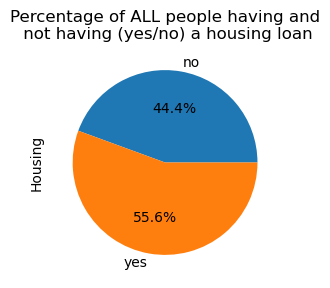

In [74]:
# This shows OVERALL the percentage of people having and not having a housing loan

#Grouping and graphing
pie_mode_housing_all = train_data_df.groupby(['Housing'])['Housing'].count()
pie_mode_housing_all.plot.pie(autopct='%1.1f%%', figsize=(3, 3), title='Percentage of ALL people having and\n not having (yes/no) a housing loan')



<Axes: title={'center': 'Percentage of ONLY the people who actually purchased the term deposit\n and have or not (yes/no) a housing loan'}, ylabel='Housing'>

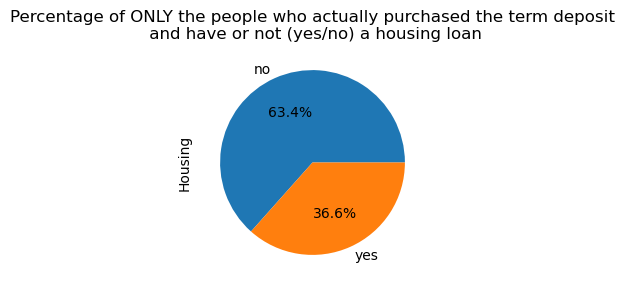

In [73]:
# This filters the records having bought a term deposit (outcome equal to yes) 
# and graphs the mode of the number of customers having a house loan or not

#Filtering the data
train_data_df_filtered = train_data_df[train_data_df['Outcome'] =='yes'] 
#Grouping and graphing
pie_mode_housing = train_data_df_filtered.groupby(['Housing'])['Housing'].count()
pie_mode_housing.plot.pie(autopct='%1.1f%%', figsize=(3, 3), title='Percentage of ONLY the people who actually purchased the term deposit\n and have or not (yes/no) a housing loan')


<Axes: title={'center': 'Percentage of ONLY the people who have a housing loan and\n if they acquired or not (yes/no) the term deppsit'}, ylabel='Outcome'>

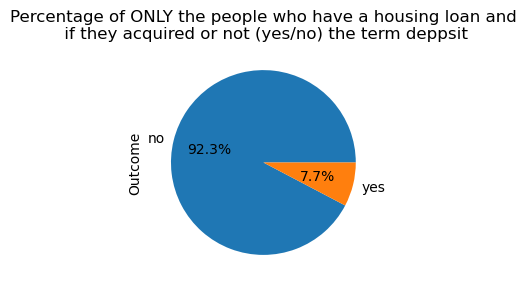

In [78]:
# This filters the records having a housing loan 
# and graphs the mode of the number of customers having bought the product

#Filtering the data
train_data_df_filtered = train_data_df[train_data_df['Housing'] =='yes'] 
#Grouping and graphing
pie_mode_housing = train_data_df_filtered.groupby(['Outcome'])['Outcome'].count()
pie_mode_housing.plot.pie(autopct='%1.1f%%', figsize=(3, 3), title='Percentage of ONLY the people who have a housing loan and\n if they acquired or not (yes/no) the term deppsit')


The correlation between customers purchasing a term deposit and if they have a house loan is PearsonRResult(statistic=-0.1391727024981668, pvalue=2.621926571898328e-194)
The model details are LinregressResult(slope=-0.09002395253461438, intercept=0.16702355460385437, rvalue=-0.1391727024981697, pvalue=2.6219265718514796e-194, stderr=0.003012620076009906, intercept_stderr=0.0022460455194902545)


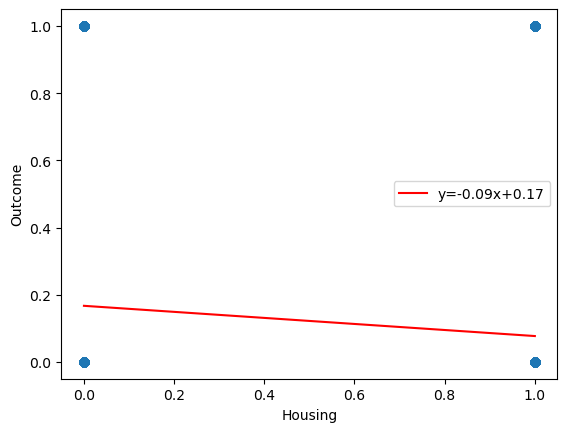

In [44]:
# This calculates the correlation between customers having a house loan and purchased the product

# Updates the values of the dataset from "yes" to 1 and from "no" to 0
train_data_df_updated = train_data_df.replace('yes',1)
train_data_df_updated2 = train_data_df_updated.replace('no',0)
train_data_df_updated2
# Calculates pearsonr and model data
corr=st.pearsonr(train_data_df_updated2['Housing'],train_data_df_updated2['Outcome'])
print(f"The correlation between customers purchasing a term deposit and if they have a house loan is {corr}")
model=st.linregress(train_data_df_updated2['Housing'],train_data_df_updated2['Outcome'])
print(f"The model details are {model}")
# Taking the values from above output
slope = -0.090
intercept = 0.167
line = slope*(train_data_df_updated2['Housing'])+intercept
# Creates the graph
plt.scatter(train_data_df_updated2['Housing'],train_data_df_updated2['Outcome'])
plt.plot(train_data_df_updated2['Housing'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Housing')
plt.ylabel('Outcome')
plt.legend()
plt.show()

## Conclusion housing analysis
The initial graph shows no evident relationship between having a housing loan and whether or not influences the decision of purchasing the product.
The second graph shows evidence that majority of the persons who bought the product did not have a housing loan.
However, after calculating their correlationship, there is no clear relationships between having or not a housing loan and purchasing a term deposit. 

# Loan analysis
This analyzes the data from the customers having a personal loan

<Axes: title={'center': 'Percentage of ALL people having and\n not having (yes/no) a personal loan'}, ylabel='Loan'>

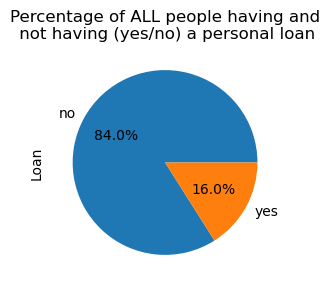

In [75]:
# This shows OVERALL the percentage of people having and not having a personal loan

#Grouping and graphing
pie_mode_housing_all = train_data_df.groupby(['Loan'])['Loan'].count()
pie_mode_housing_all.plot.pie(autopct='%1.1f%%', figsize=(3, 3), title='Percentage of ALL people having and\n not having (yes/no) a personal loan')

<Axes: title={'center': 'Percentage of ONLY the people who actually purchased the term deposit\n and have or not (yes/no) a personal loan'}, ylabel='Loan'>

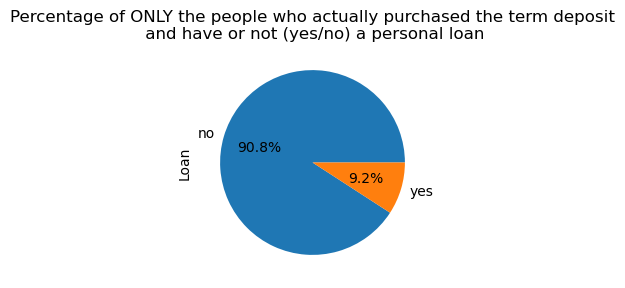

In [76]:
# This filters the records having bought a term deposit (outcome equal to yes) 
# and graphs the mode of the number of customers having a personal loan or not

train_data_df_filtered = train_data_df[train_data_df['Outcome'] =='yes'] 
pie_mode_loan = train_data_df_filtered.groupby(['Loan'])['Loan'].count()
pie_mode_loan.plot.pie(autopct='%1.1f%%', figsize=(3, 3), title='Percentage of ONLY the people who actually purchased the term deposit\n and have or not (yes/no) a personal loan')


<Axes: title={'center': 'Percentage of ONLY the people who actually have a personal loan\n and have or not (yes/no) purchased the term deposit'}, ylabel='Outcome'>

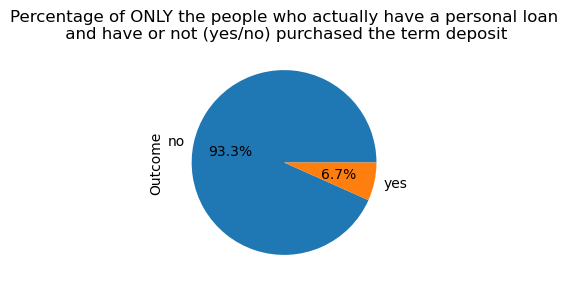

In [77]:
# This filters the records having a personal loan 
# and graphs the mode of the number of customers having bought the product

#Filtering the data
train_data_df_filtered = train_data_df[train_data_df['Loan'] =='yes'] 
#Grouping and graphing
pie_mode_loan = train_data_df_filtered.groupby(['Outcome'])['Outcome'].count()
pie_mode_loan.plot.pie(autopct='%1.1f%%', figsize=(3, 3), title='Percentage of ONLY the people who actually have a personal loan\n and have or not (yes/no) purchased the term deposit')


The correlation between customers purchasing a term deposit and if they have a personal loan is PearsonRResult(statistic=-0.06818503472419417, pvalue=9.793657535921787e-48)
The model details are LinregressResult(slope=-0.0597433584575474, intercept=0.12655727342165565, rvalue=-0.06818503472421278, pvalue=9.793657535353354e-48, stderr=0.004111271914770682, intercept_stderr=0.0016456723250011362)


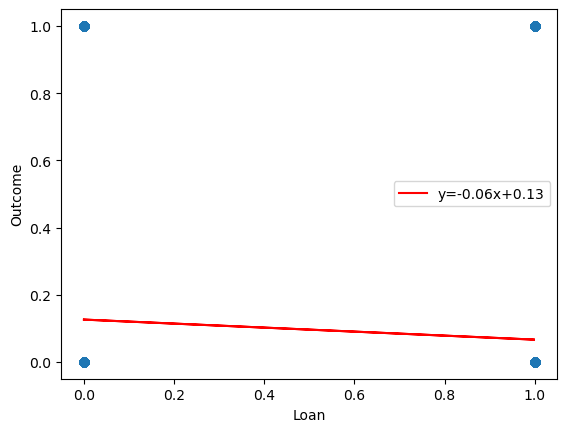

In [47]:
# This calculates the correlation between customers having a house loan and purchased the product

# Updates the values of the dataset from "yes" to 1 and from "no" to 0
train_data_df_updated = train_data_df.replace('yes',1)
train_data_df_updated2 = train_data_df_updated.replace('no',0)
train_data_df_updated2
# Calculates pearsonr and model data
corr=st.pearsonr(train_data_df_updated2['Loan'],train_data_df_updated2['Outcome'])
print(f"The correlation between customers purchasing a term deposit and if they have a personal loan is {corr}")
model=st.linregress(train_data_df_updated2['Loan'],train_data_df_updated2['Outcome'])
print(f"The model details are {model}")
# Taking the values from above output
slope = -0.0597
intercept = 0.126
line = slope*(train_data_df_updated2['Loan'])+intercept
# Creates the graph
plt.scatter(train_data_df_updated2['Loan'],train_data_df_updated2['Outcome'])
plt.plot(train_data_df_updated2['Loan'], line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.xlabel('Loan')
plt.ylabel('Outcome')
plt.legend()
plt.show()

## Conclusion loan analysis
The initial graph shows evident relationship between having a personal loan and whether or not influences the decision of purchasing the product. 
As shown in the second graph as well, majority of the persons who bought the product did not have a personal loan.
After calculating their correlationship, there is no clear relationships between having or not a personal loan and purchasing a term deposit. 